# KNN Zoo Data set 

### Problem Statement:
Implement a KNN model to classify the animals in to categorie


# ============================================================= 

# 1. Import Neccessery Libraries - 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix

In [25]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# 2. Import Warnings -  

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 3. Import Dataset -  

In [4]:
zoo = pd.read_csv('Zoo.csv')
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


# 4. EDA -  

In [5]:
zoo.shape

(101, 18)

In [6]:
zoo.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [8]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [11]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [12]:
zoo.duplicated().sum()

0

In [15]:
zoo.nunique()

animal name    100
hair             2
feathers         2
eggs             2
milk             2
airborne         2
aquatic          2
predator         2
toothed          2
backbone         2
breathes         2
venomous         2
fins             2
legs             6
tail             2
domestic         2
catsize          2
type             7
dtype: int64

# 5. Data Visualization -  

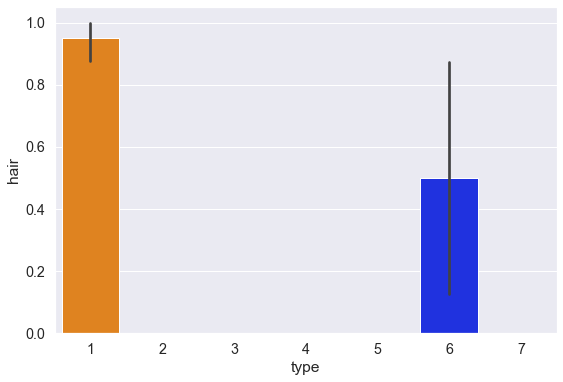

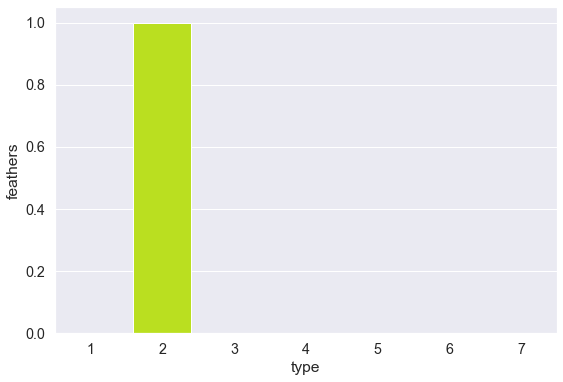

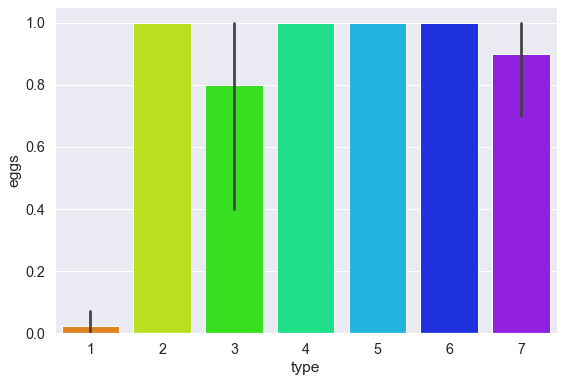

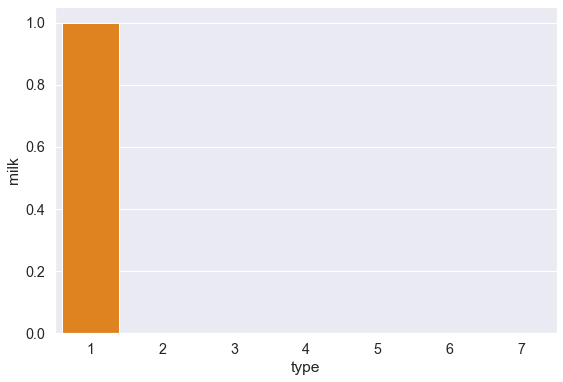

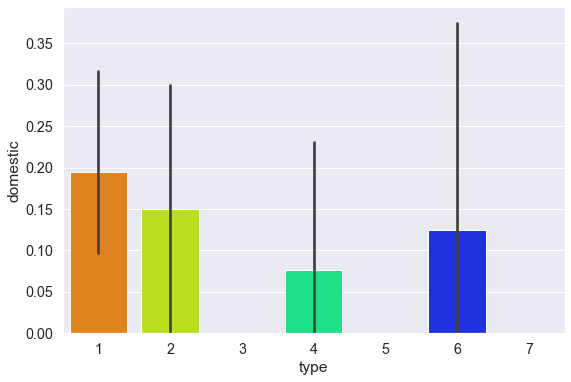

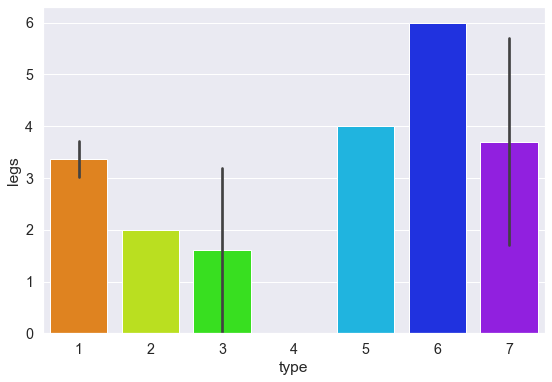

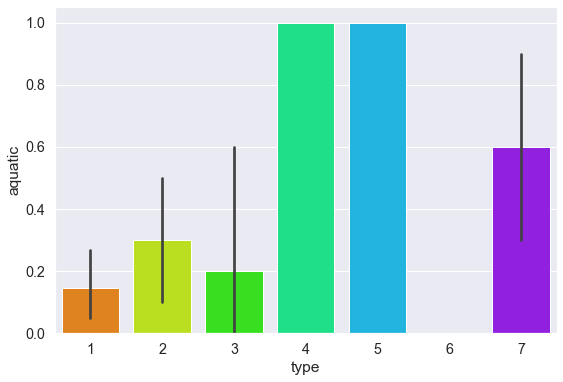

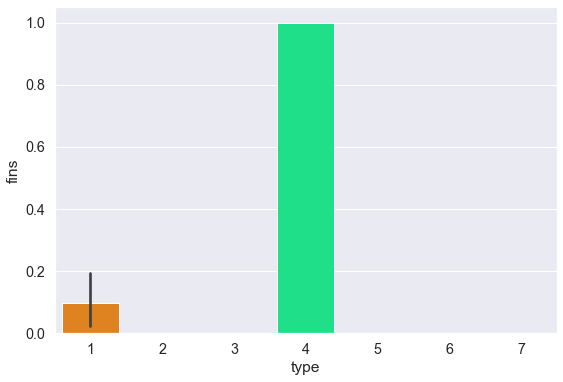

In [22]:
plt.rcParams['figure.figsize'] = [9, 6]
sns.set(style = "darkgrid", font_scale = 1.3)
a = ['hair','feathers','eggs','milk','domestic','legs','aquatic','fins','venomous']
for i in a :
    plt.figure()
    month_temp = sns.barplot(x = 'type', y = i, data = zoo,palette = 'gist_rainbow');

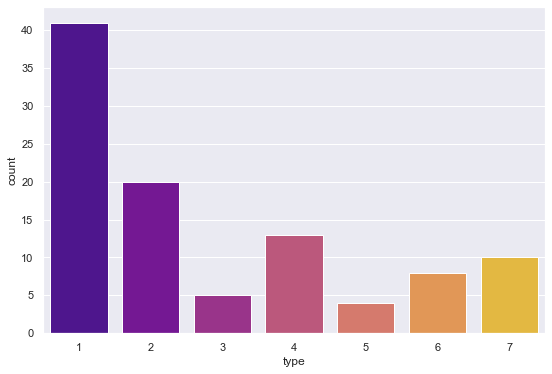

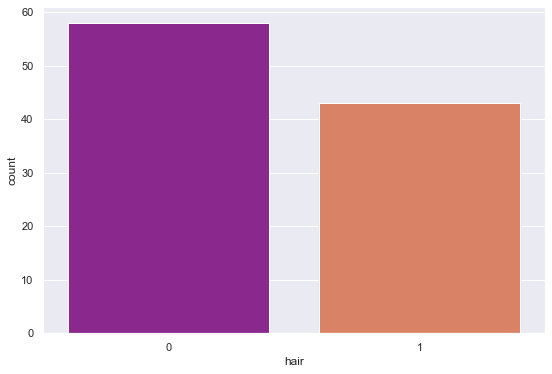

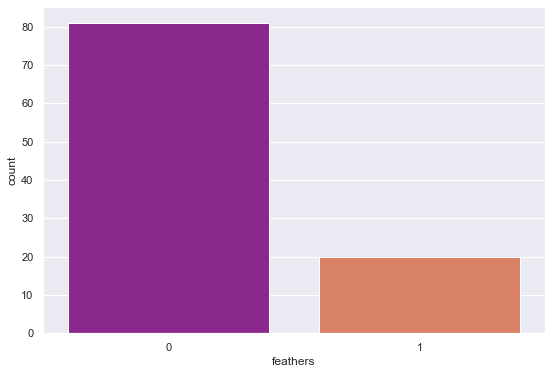

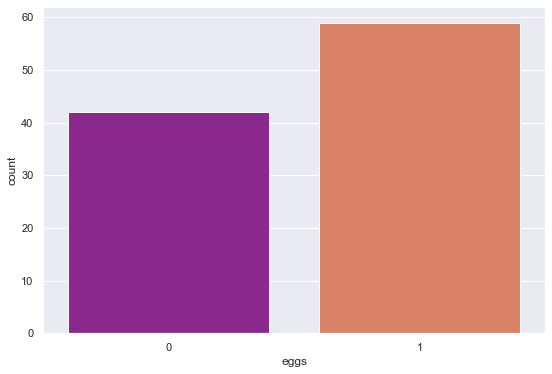

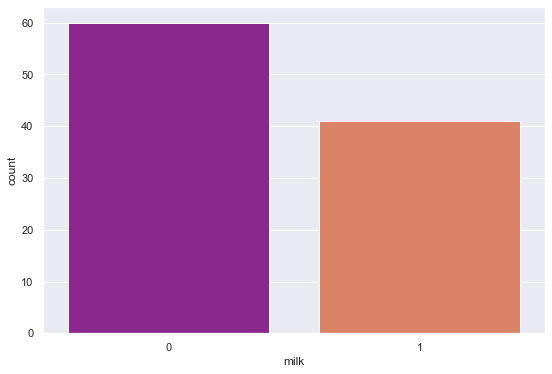

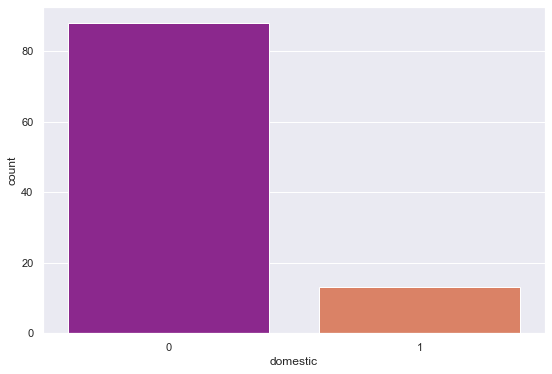

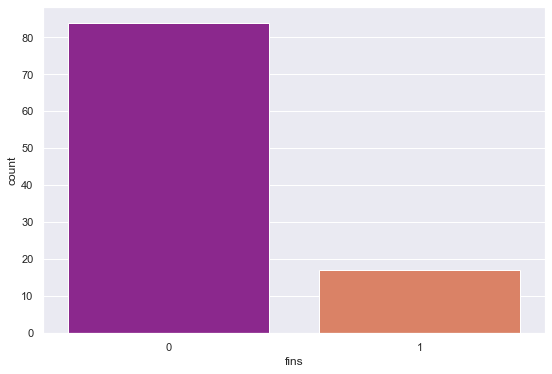

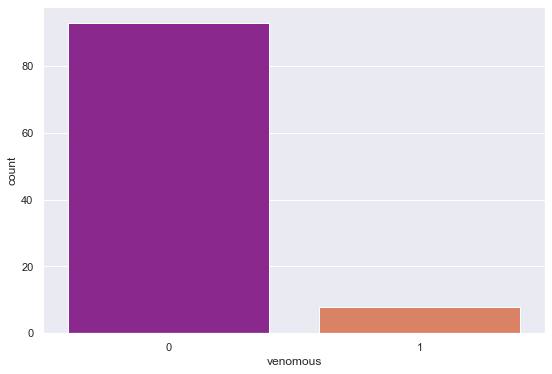

In [24]:
sns.set(rc={'figure.figsize':(9,6)})
cat_col = ['type','hair', 'feathers','eggs','milk','domestic','fins','venomous']
for col in cat_col:
    plt.figure() #this creates a new figure on which your plot will appear
    sns.countplot(x = col, data = zoo, palette = 'plasma');

# 6. Model - 1 , with all features

In [29]:
#dropping unneccesory column
zoo.drop('animal name',axis=1,inplace=True)
zoo.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [30]:
x = zoo.drop('type',axis=1)
y = zoo[['type']]

In [31]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [32]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=4)
grid.fit(x, y)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [33]:
print(grid.best_score_)
print(grid.best_params_)

0.9703846153846154
{'n_neighbors': 1}


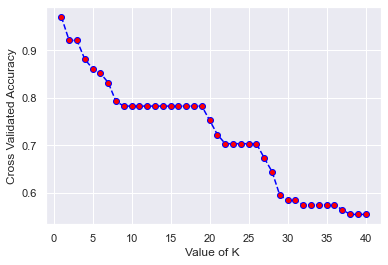

In [52]:
import matplotlib.pyplot as plt 
%matplotlib inline
k_range = range(1, 41)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=4)
    k_scores.append(scores.mean())
plt.plot(k_range, k_scores,color='blue',linestyle='dashed',marker='o',markerfacecolor='red')
plt.xlabel('Value of K ')
plt.ylabel('Cross Validated Accuracy')
plt.show()

In [37]:
model_1 = KNeighborsClassifier(n_neighbors=1)
model_1_fit = cross_val_score(model_1,x,y,cv=4)
model_1_fit.mean()

0.9703846153846154

# 7. Model using train_test_split 

In [39]:
x=zoo.drop('type',axis=1)
y=zoo[['type']]

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=10)

In [41]:
print('x_train_shape :',x_train.shape , '\ny_train_shape :',y_train.shape)
print('x_test_shape :',x_test.shape , '\ny_test_shape :',y_test.shape)

x_train_shape : (80, 16) 
y_train_shape : (80, 1)
x_test_shape : (21, 16) 
y_test_shape : (21, 1)


## Model Building || Model Training
 

In [43]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

## Model Testing 

In [44]:
#prediction for training
pred_y= model.predict(x_train)

In [53]:
#accuracy Score
accuracy_score(y_train,pred_y)*100

100.0

In [46]:
#counfusion Matrix
confusion_matrix(y_train,pred_y)

array([[34,  0,  0,  0,  0,  0,  0],
       [ 0, 17,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0],
       [ 0,  0,  0,  9,  0,  0,  0],
       [ 0,  0,  0,  0,  3,  0,  0],
       [ 0,  0,  0,  0,  0,  6,  0],
       [ 0,  0,  0,  0,  0,  0,  7]], dtype=int64)

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_train,pred_y))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         7

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



## Visualizing the CV results
 

In [97]:
import matplotlib.pyplot as plt
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []

for k in k_range:
 knn = KNeighborsClassifier(n_neighbors=k)
 scores = cross_val_score(knn, x_train, y_train, cv=5)
 k_scores.append(scores.mean())

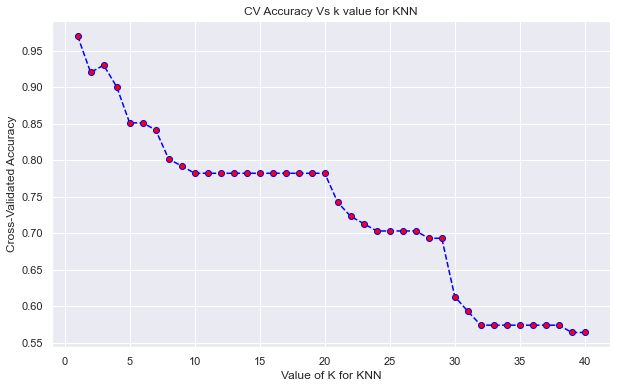

In [51]:
plt.figure(figsize=(10,6))
plt.plot(k_range, k_scores,color='blue',linestyle='dashed',marker='o',markerfacecolor='red')
plt.grid(True)
plt.title('CV Accuracy Vs k value for KNN')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# Feature Selection -  

In [57]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [58]:
x=zoo.drop('type',axis=1)
y=zoo[['type']]

In [59]:
test = SelectKBest(score_func=chi2 ,k =2)
fit  = test.fit(x,y)

In [60]:
Scores = fit.scores_

In [61]:
feat_select = pd.DataFrame(Scores,columns=['Scores'])
feat_select['Column_Names'] = pd.Series(x.columns)
feat_select.sort_values('Scores' ,ascending=False,inplace=True)

In [62]:
from sklearn.tree import  DecisionTreeClassifier

In [63]:
model1 = DecisionTreeClassifier(criterion='entropy')
fit_m = model1.fit(x,y)

In [64]:
fit_m.feature_importances_

array([0.        , 0.22819856, 0.        , 0.40756971, 0.04157898,
       0.02199263, 0.01573959, 0.        , 0.16447111, 0.01495006,
       0.        , 0.08893255, 0.01656682, 0.        , 0.        ,
       0.        ])

In [65]:
feat_select2 = pd.DataFrame(fit_m.feature_importances_ ,columns= ['Info Gained'])
feat_select2['Column_Names'] = pd.Series(x.columns)
feat_select2.sort_values('Info Gained' ,inplace=True ,ascending=False)

In [90]:
total =pd.merge(feat_select,feat_select2, on ='Column_Names',how= 'outer')
zoo_new = total.iloc[0:10 ,:]

In [91]:
zoo_new

,Scores,Column_Names,Info Gained
0,81.170621,legs,0.016567
1,81.000000,feathers,0.228199
2,62.553802,fins,0.088933
3,60.000000,milk,0.407570
4,49.214736,airborne,0.041579
5,48.833806,hair,0.000000
6,37.419719,eggs,0.000000
7,37.060056,toothed,0.000000
8,29.868970,aquatic,0.021993
9,20.976006,catsize,0.000000


In [93]:
zoo_filtered = zoo[['legs','feathers','fins','milk','airborne','hair','eggs','toothed','aquatic','catsize','type']]

In [94]:
zoo_filtered

,legs,feathers,fins,milk,airborne,hair,eggs,toothed,aquatic,catsize,type
0,4,0,0,1,0,1,0,1,0,1,1
1,4,0,0,1,0,1,0,1,0,1,1
2,0,0,1,0,0,0,1,1,1,0,4
3,4,0,0,1,0,1,0,1,0,1,1
4,4,0,0,1,0,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
96,2,0,0,1,0,1,0,1,0,1,1
97,6,0,0,0,1,1,1,0,0,0,6
98,4,0,0,1,0,1,0,1,0,1,1
99,0,0,0,0,0,0,1,0,0,0,7


In [95]:
x=zoo_filtered.drop('type',axis=1)
y=zoo_filtered[['type']]

In [96]:
model_2 = KNeighborsClassifier(n_neighbors=1)
model_2_fit = cross_val_score(model_2,x,y,cv=4)
model_2_fit.mean()

0.9307692307692308